All the functions we will use are in the file FeatureExtraction.py, which we import here.

In [36]:
run FeatureExtraction.py

We also import a library for displaying images.

In [3]:
from IPython.display import Image, display

To keep the computation within a reasonable time frame, we will choose a random subset of ten users to deal with:

In [38]:
#Feel free to vary this parameter
sample_size = 7

#User 733162 has a file missing, so we make sure not to select that user
potential_users = list(filter(lambda x: x != '733162', get_user_ids()))
user_list = random.sample(potential_users, sample_size)
print(user_list)

['827212', '366286', '808022', '431312', '527796', '865501', '986737']


First we need to choose which task to focus on (such as Reading and Sitting or Map and Walking), what kind of touch event to focus on (the options being Touch, KeyPress, OneFingerTouch, Pinch, Scroll, and Stroke), and which reading value to focus on (such as accelerometer Z data or gyroscope X data).

In [5]:
#These parameters can also be varied freely
task_name = 'Writing+Walking'
tap_feature_name = 'KeyPress'
reading_value = 'gyroY'

We first create histograms that represent each of our users for this combination of task name, tap feature, and reading value, and write the frequencies of these histograms to csv files. This may take several minutes to run. It will print what user and session it is working on as it goes, and "Finished!" when it is done.

In [12]:
write_shape_csv_for_each_user(task_name, tap_feature_name, reading_value, \
                              list_of_users = user_list, histograms = True, path = 'Notebook/')

Investigating user: 389015
Session: 389015_session_10
Session: 389015_session_2
Session: 389015_session_3
Session: 389015_session_7
Investigating user: 693572
Session: 693572_session_20
Session: 693572_session_22
Session: 693572_session_4
Session: 693572_session_9
Investigating user: 876011
Session: 876011_session_16
Session: 876011_session_18
Session: 876011_session_21
Session: 876011_session_4
Investigating user: 220962
Session: 220962_session_11
Session: 220962_session_15
Session: 220962_session_6
Session: 220962_session_8
Investigating user: 554303
Session: 554303_session_12
Session: 554303_session_3
Session: 554303_session_4
Session: 554303_session_7
Investigating user: 803262
Session: 803262_session_17
Session: 803262_session_18
Session: 803262_session_19
Session: 803262_session_20
Investigating user: 990622
Session: 990622_session_12
Session: 990622_session_19
Session: 990622_session_24
Session: 990622_session_8
Investigating user: 527796
Session: 527796_session_17
Session: 5277

We now have histograms for each user session, along with csv files that have the normalized frequency (between 0 and 1) of each cell. Let's see what they look like.

Plot for 220962_session_6, Writing+Walking, KeyPress, gyroY:


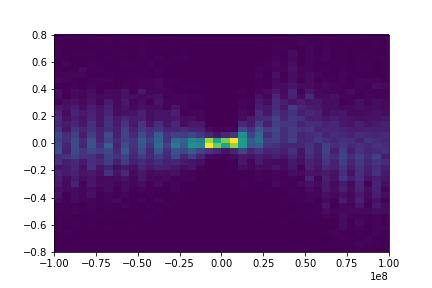

Corresponding data in csv (first few rows out of 1600):


0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000066
Name: Writing+Walking, gyroY, KeyPress, 220962_session_6, dtype: float64

In [26]:
#If you want to see a specific user and session, just change these two values
user = random.choice(user_list)
session = random.choice(get_user_session_ids_for_task(user, task_name))

def plot_hist(user, session):
    print('Plot for ' + session + ', ' + task_name + ', ' + tap_feature_name + ', ' + reading_value + ':')
    display(Image(filename='Notebook/'+user+'/'+task_name+\
                  '/'+session+'/'+tap_feature_name+'/HullPlot_'+reading_value+'.png'))

plot_hist(user, session)

print('Corresponding data in csv (first few rows out of 1600):')
data = pd.read_csv('Notebook/'+user+'/ShapeVectors.csv')
col = data[task_name + ', ' + reading_value + ', ' + tap_feature_name + ', ' + session]
col.head(5)

As a first attempt, we will use a simple linear distance metric to evaluate the distance between users. That is, we will treat each $40 \times 40$ grid of frequencies as a vector in $\mathbb{R}^{1600}$, and take the Euclidean distance between them. This code below will evaluate the distance between each pair of sessions, and compare the mean and standard deviation for distances between sessions from the same user, to the mean and standard deviation for distances between sessions from different users:

In [23]:
find_distances(task_name, tap_feature_name, reading_value, list_of_users = user_list)

Comparing 389015_session_10 to other sessions
Comparing 389015_session_2 to other sessions
Comparing 389015_session_3 to other sessions
Comparing 389015_session_7 to other sessions
Comparing 693572_session_20 to other sessions
Comparing 693572_session_22 to other sessions
Comparing 693572_session_4 to other sessions
Comparing 693572_session_9 to other sessions
Comparing 876011_session_16 to other sessions
Comparing 876011_session_18 to other sessions
Comparing 876011_session_21 to other sessions
Comparing 876011_session_4 to other sessions
Comparing 220962_session_11 to other sessions
Comparing 220962_session_15 to other sessions
Comparing 220962_session_6 to other sessions
Comparing 220962_session_8 to other sessions
Comparing 554303_session_12 to other sessions
Comparing 554303_session_3 to other sessions
Comparing 554303_session_4 to other sessions
Comparing 554303_session_7 to other sessions
Comparing 803262_session_17 to other sessions
Comparing 803262_session_18 to other sessions

This code block will use the first two sessions for each user (out of the four corresponding to the given task) as training data, and attempt to classify the remaining sessions by which user they belong to, based on which other session data is the closest.

In [19]:
test_user_identification(task_name, tap_feature_name, reading_value, user_list)

Number of attempted identifications: 20
Number of successful identifications: 16
Success rate: 0.8
Unsuccessful classifications:
The nearest neighbor of 693572_session_4 was 737973_session_12
The nearest neighbor of 876011_session_21 was 737973_session_12
The nearest neighbor of 220962_session_6 was 737973_session_12
The nearest neighbor of 220962_session_8 was 737973_session_12


This below will combine data from every possible combination of tap event type and reading to better determine whether two sets of session data came from the same user.

In [39]:
test_identification(task_name, user_list)

Building a threshold dictionary...
Touch
accelX
Comparing 827212_session_1 to other sessions
Comparing 827212_session_16 to other sessions
Comparing 366286_session_14 to other sessions
Comparing 366286_session_19 to other sessions
Comparing 808022_session_15 to other sessions
Comparing 808022_session_18 to other sessions
Comparing 431312_session_12 to other sessions
Comparing 431312_session_20 to other sessions
Comparing 527796_session_17 to other sessions
Comparing 527796_session_18 to other sessions
Comparing 865501_session_15 to other sessions
Comparing 865501_session_22 to other sessions
Comparing 986737_session_10 to other sessions
Comparing 986737_session_17 to other sessions
accelY
Comparing 827212_session_1 to other sessions
Comparing 827212_session_16 to other sessions
Comparing 366286_session_14 to other sessions
Comparing 366286_session_19 to other sessions
Comparing 808022_session_15 to other sessions
Comparing 808022_session_18 to other sessions
Comparing 431312_session_12

Comparing 527796_session_17 to other sessions
Comparing 527796_session_18 to other sessions
Comparing 865501_session_15 to other sessions
Comparing 865501_session_22 to other sessions
Comparing 986737_session_10 to other sessions
Comparing 986737_session_17 to other sessions
accelY
Comparing 827212_session_1 to other sessions
Comparing 827212_session_16 to other sessions
Comparing 366286_session_14 to other sessions
Comparing 366286_session_19 to other sessions
Comparing 808022_session_15 to other sessions
Comparing 808022_session_18 to other sessions
Comparing 431312_session_12 to other sessions
Comparing 431312_session_20 to other sessions
Comparing 527796_session_17 to other sessions
Comparing 527796_session_18 to other sessions
Comparing 865501_session_15 to other sessions
Comparing 865501_session_22 to other sessions
Comparing 986737_session_10 to other sessions
Comparing 986737_session_17 to other sessions
accelZ
Comparing 827212_session_1 to other sessions
Comparing 827212_sessi